***

# <p style="text-align: center"> Predictive Maintenance Project </p>

### <p style="text-align: center"> Barrée Guillaume </p>

#### <p style="text-align: center"> 05/05/2020 </p>


***

# Data understanding and preprocessing


> ####  Modules

In [59]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

> ####  Data

In [110]:
raw_data_train = pd.read_csv('PM_train.csv', sep=';', header = None)

""" Create a header based on documentation """
raw_data_train.columns = ["id", "cycle"] + ["setting_" + str(i) for i in range(1,4)] + ["sensor_" + str(i) for i in range(1,22)]
raw_data_train.head()

,id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [111]:
data_test = pd.read_csv('PM_test.csv', sep=';', header = None)

""" Create a header based on documentation """

data_test.columns = ["id", "cycle"] + ["setting_" + str(i) for i in range(1,4)] + ["sensor_" + str(i) for i in range(1,22)]
data_test.head()

,id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [112]:
data_truth=pd.read_csv('PM_truth.csv',sep=';',header=None)
data_truth['id']=data_truth.index+1
data_truth[0] = pd.DataFrame(data_test.groupby('id')['cycle'].max()).reset_index().cycle+data_truth[0]
data_truth.head()

,0,id
0,143,1
1,147,2
2,195,3
3,188,4
4,189,5


In [113]:
# For each cycle, compute time to failure
data_test=data_test.merge(data_truth,on=['id'],how='left')
data_test['time_to_failure']=data_test[0] - data_test['cycle']
data_test.drop([0], axis=1, inplace=True)
data_test.head(5)

,id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,time_to_failure
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,138


In [116]:
# For each cycle of the training set, compute the time to failure
raw_data_train['time_to_failure'] = raw_data_train.groupby(['id'])['cycle'].transform(max)-raw_data_train['cycle']
raw_data_train.head()

,id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,time_to_failure
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [8]:
# To handle a classification probleme we will define 2 or 3 categories. [No problem, Critical] / [No problem, Risk, Critical]

def get_category(df,critical_values):
    N_samples = len(df["time_to_failure"])
    N_cat = len(critical_values)
    liste = []
    for i in range(N_samples):
        for thresholds_index in range(N_cat):
            value = df["time_to_failure"][i]
            if value >= critical_values[thresholds_index]:
                liste.append(thresholds_index)
                break
            elif value < critical_values[-1]:
                liste.append(N_cat)
                break
    liste = pd.DataFrame(liste)
    liste.columns = ["critical_category"]
    return liste

period = [15]

classification_target_train = get_category(raw_data_train,period)
raw_data_train["critical_category"] = classification_target_train

classification_target_test = get_category(data_test,period)
data_test["critical_category"] = classification_target_test

> ####  Data pre processing

In [9]:
""" Make a copy of the raw datasets"""
df_train=raw_data_train.copy()
df_test=data_test.copy()

""" Check for missing values"""
print(df_train.isnull().sum())

""" Describe the data set """
df_train.describe()

id                   0
cycle                0
setting_1            0
setting_2            0
setting_3            0
sensor_1             0
sensor_2             0
sensor_3             0
sensor_4             0
sensor_5             0
sensor_6             0
sensor_7             0
sensor_8             0
sensor_9             0
sensor_10            0
sensor_11            0
sensor_12            0
sensor_13            0
sensor_14            0
sensor_15            0
sensor_16            0
sensor_17            0
sensor_18            0
sensor_19            0
sensor_20            0
sensor_21            0
time_to_failure      0
critical_category    0
dtype: int64


,id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,time_to_failure,critical_category
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862,0.072706
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,68.880990,0.259660
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000,0.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000,0.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000,0.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000,1.000000


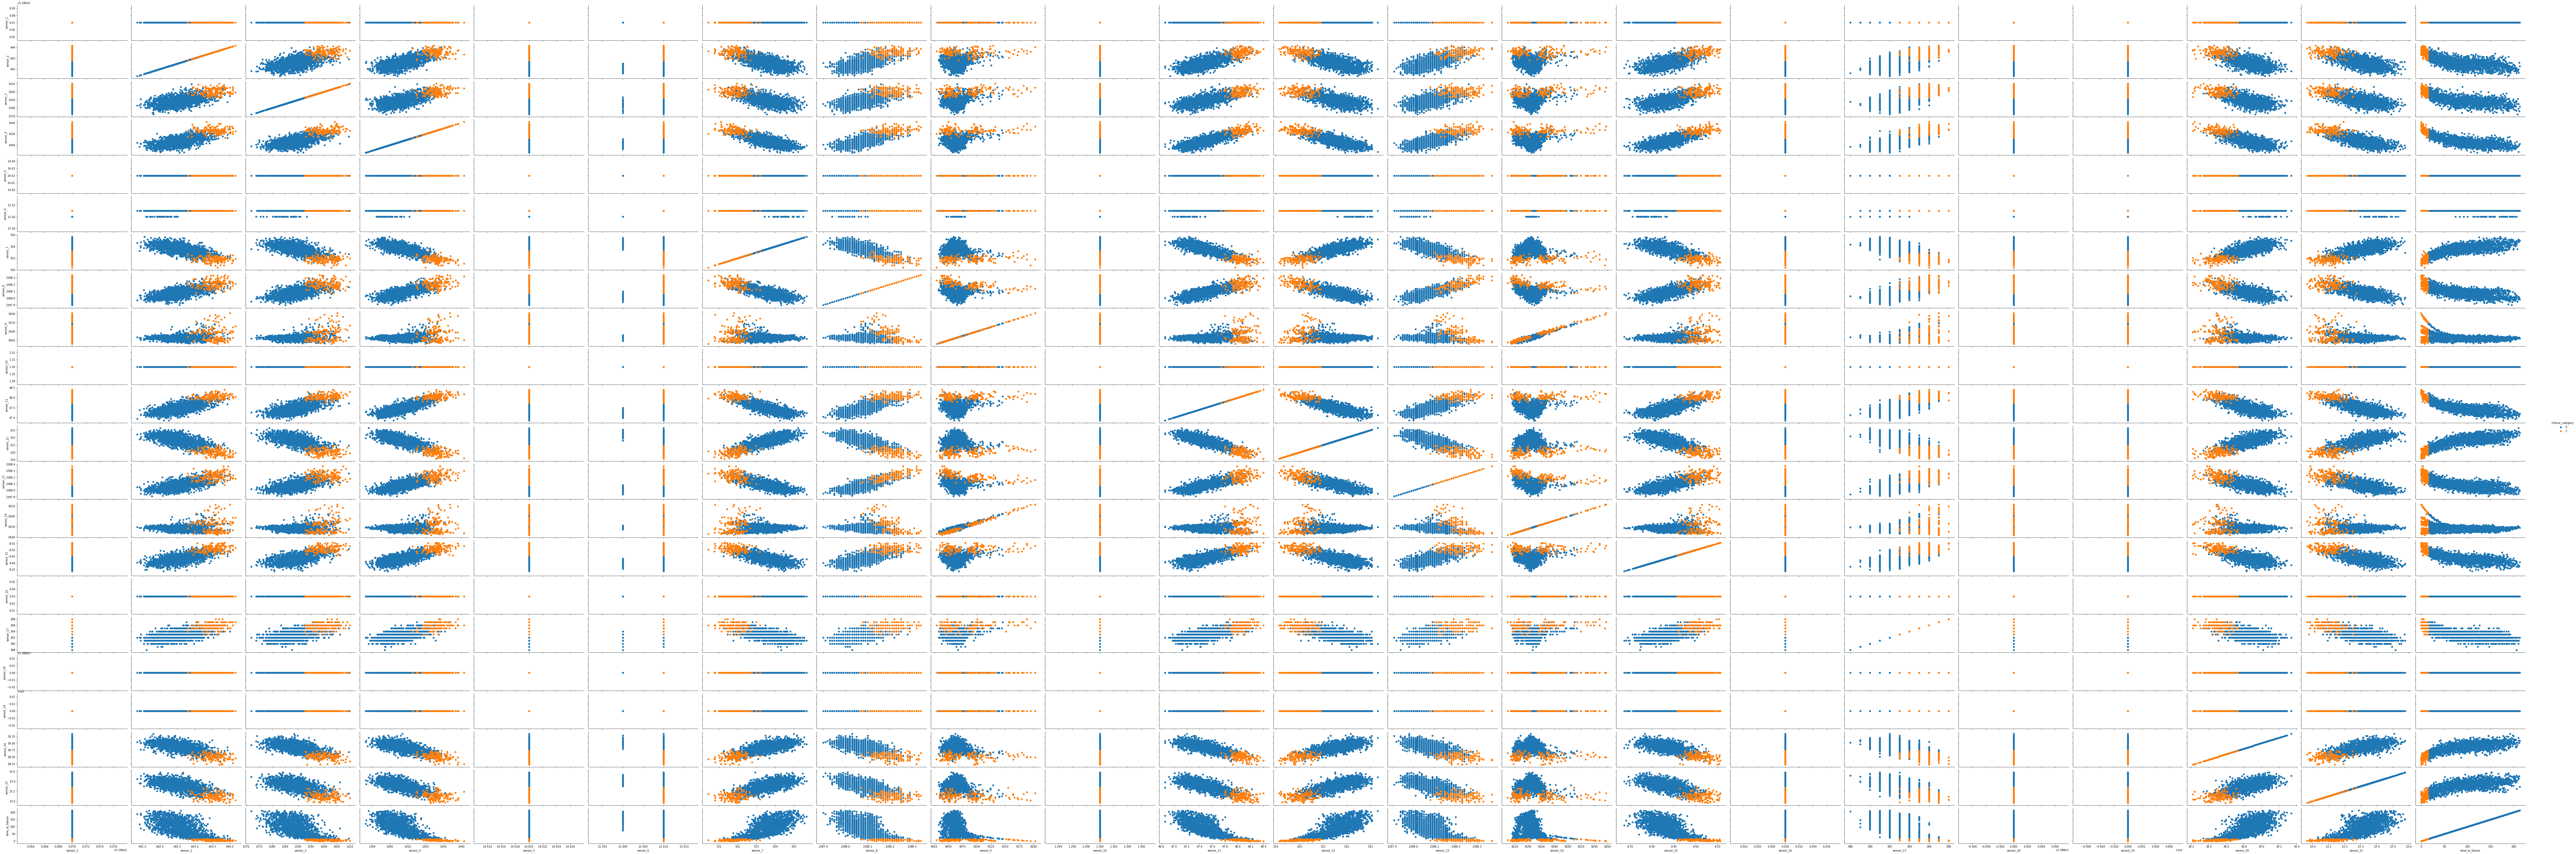

In [19]:
d1 = list(np.random.randint(1,100,10))
a = df_train[df_train['id'].isin(d1)]
explore = sns.PairGrid(data = a ,
                 x_vars=["sensor_" + str(i) for i in range(1,22)]+["time_to_failure"],
                 y_vars=["sensor_" + str(i) for i in range(1,22)]+["time_to_failure"],    
                 hue="critical_category", size=2, aspect=3)
explore = explore.map(plt.scatter)
explore = explore.add_legend()
explore = explore
explore.savefig("non_influence_features_1")

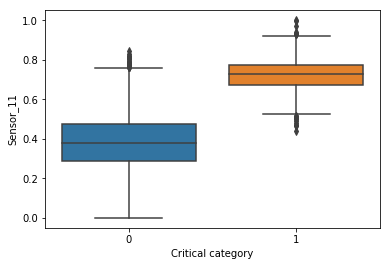

In [328]:
# df_train[df_train["critical_category"] == 1].boxplot(["sensor_9"])
# df_train[df_train["critical_category"] == 0].boxplot(["sensor_9"])
fig, ax = plt.subplots()
sns.boxplot(x=list(df_train["critical_category"]),y=list(df_train["sensor_11"]),ax=ax).set(xlabel='Critical category', ylabel='Sensor_11')
plt.savefig('your_figure.png')

In [10]:
""" Remove useless features"""

df_train.drop(["setting_1","setting_2","setting_3","sensor_1","sensor_5","sensor_10","sensor_16","sensor_18","sensor_19"], axis = 1, inplace=True)
df_test.drop(["setting_1","setting_2","setting_3","sensor_1","sensor_5","sensor_10","sensor_16","sensor_18","sensor_19"], axis = 1, inplace=True)

feature_columns = ["id","cycle","sensor_2",'sensor_3', 'sensor_4', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11','sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21','time_to_failure',"critical_category"]


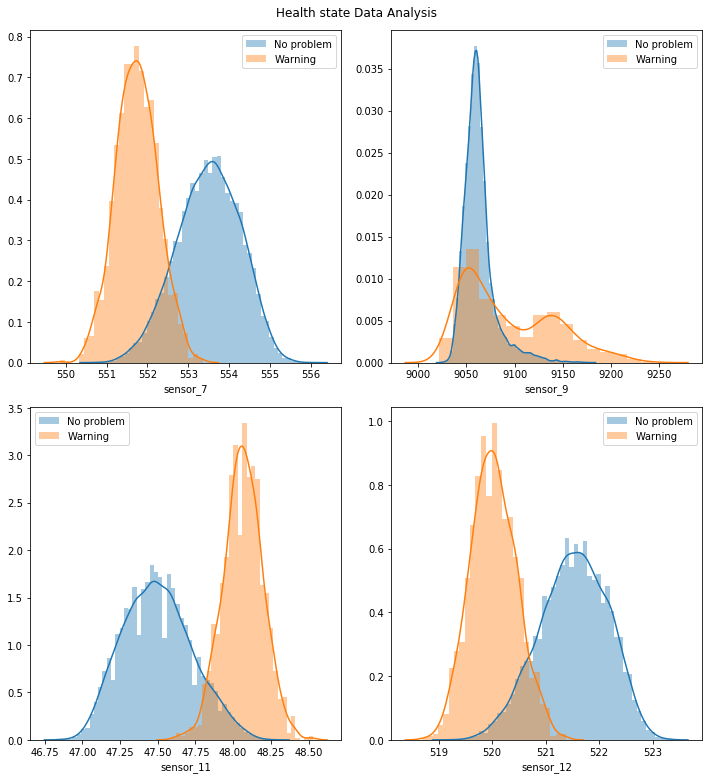

<Figure size 432x288 with 0 Axes>

In [11]:
fig = plt.figure(figsize = (10, 11))
j = 0
for i in ["sensor_" + str(i) for i in [7,9,11,12]]:
    try:
        plt.subplot(2, 2, j+1)
        j += 1
        sns.distplot(df_train[i][df_train['critical_category']==0], label = 'No problem')
        sns.distplot(df_train[i][df_train['critical_category']==1], label = 'Warning')
        plt.legend(loc='best')
    except:
        pass
fig.suptitle('Health state Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()
plt.savefig('your_figure.png')

In [12]:
corr = df_train[["sensor_2",'sensor_3', 'sensor_4', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11','sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']].corr()
corr.style.background_gradient(cmap='coolwarm')

,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
sensor_2,1.000000,0.602610,0.714949,0.132242,-0.702136,0.662325,0.273764,0.740020,-0.724578,0.661792,0.179752,0.675975,0.629886,-0.661841,-0.668050
sensor_3,0.602610,1.000000,0.678413,0.116039,-0.664595,0.602481,0.322964,0.695900,-0.680307,0.600963,0.237137,0.639921,0.600017,-0.625941,-0.633901
sensor_4,0.714949,0.678413,1.000000,0.150480,-0.793130,0.746852,0.297429,0.830136,-0.815591,0.745158,0.190748,0.758459,0.703499,-0.748067,-0.745193
sensor_6,0.132242,0.116039,0.150480,1.000000,-0.155720,0.152161,0.019347,0.160014,-0.155884,0.158276,-0.002112,0.149042,0.130810,-0.141419,-0.137419
sensor_7,-0.702136,-0.664595,-0.793130,-0.155720,1.000000,-0.767132,-0.217835,-0.822805,0.812713,-0.764611,-0.110053,-0.747051,-0.692893,0.736163,0.737447
sensor_8,0.662325,0.602481,0.746852,0.152161,-0.767132,1.000000,-0.032091,0.782213,-0.786540,0.826084,-0.144787,0.700949,0.627785,-0.687030,-0.688840
sensor_9,0.273764,0.322964,0.297429,0.019347,-0.217835,-0.032091,1.000000,0.274591,-0.210238,-0.034763,0.963157,0.293753,0.337110,-0.285280,-0.292795
sensor_11,0.740020,0.695900,0.830136,0.160014,-0.822805,0.782213,0.274591,1.000000,-0.846884,0.780761,0.163408,0.780913,0.722296,-0.771510,-0.772554
sensor_12,-0.724578,-0.680307,-0.815591,-0.155884,0.812713,-0.786540,-0.210238,-0.846884,1.000000,-0.788441,-0.098141,-0.766052,-0.703485,0.751943,0.756263
sensor_13,0.661792,0.600963,0.745158,0.158276,-0.764611,0.826084,-0.034763,0.780761,-0.788441,1.000000,-0.147036,0.697662,0.627410,-0.686172,-0.688948


# Classification 

## Random Forest

In [25]:
X = df_train.iloc[:,2:-2]
y = df_train["critical_category"]
X_validation = df_test.iloc[:,2:-2]
y_validation = df_test["critical_category"]

In [9]:
# Modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

In [27]:
RF = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Feature ranking:
1 sensor_11 	 0.20796529335310507
2 sensor_4 	 0.14172438057375758
3 sensor_12 	 0.10402650776467202
4 sensor_7 	 0.09201330733568447
5 sensor_21 	 0.08189679475024554
6 sensor_15 	 0.07731368027013756
7 sensor_20 	 0.05283523576416672
8 sensor_9 	 0.05178704970992101
9 sensor_14 	 0.0459568162650149
10 sensor_2 	 0.04363534547503925
11 sensor_3 	 0.03614971317912424
12 sensor_17 	 0.02675647939936903
13 sensor_13 	 0.021712951282176
14 sensor_8 	 0.016226444877586683
15 sensor_6 	 0.0


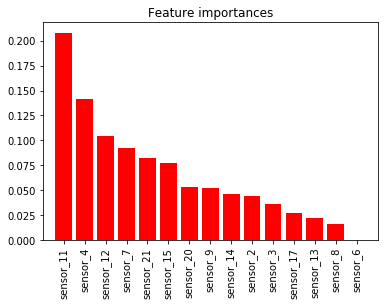

In [59]:
importances = RF.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f + 1, feature_names[indices[f]],'\t', importances[indices[f]])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [45]:
y_pred = RF.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[4768   54]
 [  66  270]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4822
           1       0.83      0.80      0.82       336

    accuracy                           0.98      5158
   macro avg       0.91      0.90      0.90      5158
weighted avg       0.98      0.98      0.98      5158



In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 30, 50, 70, 90, None],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500, 800, 1000]
}
# Create a based model
RF = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [50]:
RF = RandomForestClassifier(bootstrap=True, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=0, verbose=0)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[4774   48]
 [  63  273]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4822
           1       0.85      0.81      0.83       336

    accuracy                           0.98      5158
   macro avg       0.92      0.90      0.91      5158
weighted avg       0.98      0.98      0.98      5158



In [52]:
y_pred = RF.predict(X_validation)

print("Confusion Matrix:")
print(confusion_matrix(y_validation, y_pred))
print("\nClassification Report:")
print(classification_report(y_validation, y_pred))

Confusion Matrix:
[[13038     8]
 [   25    25]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13046
           1       0.76      0.50      0.60        50

    accuracy                           1.00     13096
   macro avg       0.88      0.75      0.80     13096
weighted avg       1.00      1.00      1.00     13096



## Gradient Boosting

In [53]:
X = df_train.iloc[:,2:-2]
y = df_train["critical_category"]
X_validation = df_test.iloc[:,2:-2]
y_validation = df_test["critical_category"]

In [10]:
# Modules
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelBinarizer

In [55]:
GB = GradientBoostingClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y)
GB.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Feature ranking:
1 sensor_11 	 0.525694682970922
2 sensor_7 	 0.07711766069889404
3 sensor_9 	 0.0689858174025419
4 sensor_12 	 0.06375280778468298
5 sensor_4 	 0.0631153054676609
6 sensor_15 	 0.05270525825843474
7 sensor_2 	 0.031321779107459743
8 sensor_14 	 0.030181957956684463
9 sensor_21 	 0.026549875006364416
10 sensor_20 	 0.02358011120612936
11 sensor_3 	 0.013317733758565821
12 sensor_13 	 0.013233816326325663
13 sensor_8 	 0.008192862318510796
14 sensor_17 	 0.0022503317368231805
15 sensor_6 	 0.0


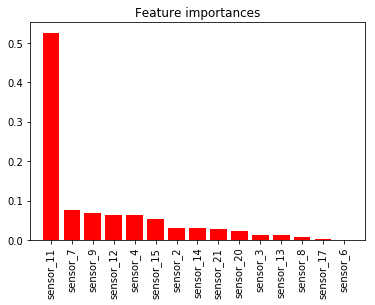

In [60]:
importances = GB.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f + 1, feature_names[indices[f]],'\t', importances[indices[f]])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [64]:
y_pred = GB.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[4718   57]
 [  57  326]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4775
           1       0.85      0.85      0.85       383

    accuracy                           0.98      5158
   macro avg       0.92      0.92      0.92      5158
weighted avg       0.98      0.98      0.98      5158



In [62]:
def plot_importance(alg, X):
    importances = alg.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_names = X.columns
    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print(f + 1, feature_names[indices[f]],'\t', importances[indices[f]])

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r")
    plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()
    
    
def modelfit(alg, X, y, performCV=True, printFeatureImportance=True, cv_folds=5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    alg.fit(X_train, y_train)
        
    #Predict training set:
    y_train_prediction = alg.predict(X_train)
    y_test_prediction = alg.predict(X_test)
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X, y, cv=cv_folds, scoring='f1')
       

    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(y_test, y_test_prediction))
    print("AUC Score : %f" % roc_auc_score(y_test, y_test_prediction))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    plot_importance(alg, X)

In [ ]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingClassifier(learning_rate=eta)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, "b", label="Train AUC")
line2, = plt.plot(learning_rates, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("learning rate")
plt.show()

In [ ]:
n_estimators = [100,300,500,750,800,1000,1200]
train_results = []
test_results = []
for estimator in n_estimators:
    model = RandomForestClassifier(n_estimators=estimator)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimator")
plt.show()

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    model = RandomForestClassifier(n_estimators = 800, max_depth=max_depth)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

In [ ]:
min_samples_splits = [2,5,10,15,20,25,30]
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    model = GradientBoostingClassifier(n_estimators=800, max_depth=17, min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples splits")
plt.show()

In [ ]:
min_samples_leafs = [20,30,40,50,60,70,80,90,100]
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_depth=5, min_samples_split=800, min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leafs")
plt.show()

In [ ]:
max_features = [2,3,4,5,6,7,8,9,10,11,12]
train_results = []
test_results = []
for max_feature in max_features:
    model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_depth=5, min_samples_split=800, min_samples_leaf=50,max_features=max_feature)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, "b", label="Train AUC")
line2, = plt.plot(max_features, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("max features")
plt.show()

In [ ]:
subsamples = [0.6,0.7,0.75,0.8,0.85,0.9]
train_results = []
test_results = []
for subsample in subsamples:
    model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_depth=5, min_samples_split=800, min_samples_leaf=50,max_features=8,subsample=subsample)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(subsamples, train_results, "b", label="Train AUC")
line2, = plt.plot(subsamples, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("subsamples")
plt.show()

In [74]:
model = gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7, min_samples_split=800,min_samples_leaf=70, subsample=0.9, random_state=10, max_features=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[4712   63]
 [  53  330]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4775
           1       0.84      0.86      0.85       383

    accuracy                           0.98      5158
   macro avg       0.91      0.92      0.92      5158
weighted avg       0.98      0.98      0.98      5158



In [73]:
model = gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7, min_samples_split=800,min_samples_leaf=70, subsample=0.9, random_state=10, max_features=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_validation)

print("Confusion Matrix:")
print(confusion_matrix(y_validation, y_pred))
print("\nClassification Report:")
print(classification_report(y_validation, y_pred))

Confusion Matrix:
[[13032    14]
 [   20    30]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13046
           1       0.68      0.60      0.64        50

    accuracy                           1.00     13096
   macro avg       0.84      0.80      0.82     13096
weighted avg       1.00      1.00      1.00     13096



## SVC

In [16]:
X = df_train.iloc[:,2:-2]
y = df_train["critical_category"]
X_validation = df_test.iloc[:,2:-2]
y_validation = df_test["critical_category"]

In [11]:
# Modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [17]:
# Standardization
sc=MinMaxScaler()
X =sc.fit_transform(X)
X_validation = sc.transform(X_validation)

In [79]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(class_weight="balanced",kernel='poly', degree=1, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(class_weight="balanced",kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(class_weight="balanced",kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(class_weight="balanced",kernel='linear', gamma="auto")
    
for i in range(4):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
# test a SVC model using different kernal
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)
# Make prediction
    y_pred = svclassifier.predict(X_test)
# Evaluate our model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

Confusion Matrix:
[[4425  359]
 [   6  368]]
Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4784
           1       0.51      0.98      0.67       374

    accuracy                           0.93      5158
   macro avg       0.75      0.95      0.81      5158
weighted avg       0.96      0.93      0.94      5158

Confusion Matrix:
[[4655  152]
 [  79  272]]
Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4807
           1       0.64      0.77      0.70       351

    accuracy                           0.96      5158
   macro avg       0.81      0.87      0.84      5158
weighted avg       0.96      0.96      0.96      5158

Confusion Matrix:
[[4778    0]
 [ 380    0]]
Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4778
           1       0.0

C:\Users\Barrée\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[4413  385]
 [   4  356]]
Evaluation: Linear kernel
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4798
           1       0.48      0.99      0.65       360

    accuracy                           0.92      5158
   macro avg       0.74      0.95      0.80      5158
weighted avg       0.96      0.92      0.94      5158



In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(class_weight='balanced'),param_grid,refit=True,verbose=2,scoring="f1")
grid.fit(X_train,y_train)
print(grid.best_estimator_)

In [ ]:
y_pred = grid.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
y_pred = grid.predict(X_validation)
print("Confusion Matrix:")
print(confusion_matrix(y_validation, y_pred))
print("Classification Report:")
print(classification_report(y_validation, y_pred))

In [ ]:
erreur = []
for i in range(len(y_test)):
    if y_validation[i] > y_pred[i]:
        erreur.append([df_test.iloc[i,0]]+list(df_test.iloc[i,-2:])+[y_pred[i]])
erreur 

## LSTM

In [12]:
# Modules
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.callbacks import EarlyStopping

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [25]:
df_train=raw_data_train.copy()
df_test=data_test.copy()

In [26]:
sc=MinMaxScaler()
df_train[["setting_"+str(i) for i in range(1,4)]+["sensor_"+str(i) for i in range(1,22)]] = sc.fit_transform(df_train[["setting_"+str(i) for i in range(1,4)]+["sensor_"+str(i) for i in range(1,22)]])
df_test[["setting_"+str(i) for i in range(1,4)]+["sensor_"+str(i) for i in range(1,22)]] = sc.transform(df_test[["setting_"+str(i) for i in range(1,4)]+["sensor_"+str(i) for i in range(1,22)]])

In [27]:
df_train.drop(["setting_3","sensor_1","sensor_5","sensor_10","sensor_16","sensor_18","sensor_19"], axis = 1, inplace=True)
df_test.drop(["setting_3","sensor_1","sensor_5","sensor_10","sensor_16","sensor_18","sensor_19"], axis = 1, inplace=True)
df_train.head()

,id,cycle,setting_1,setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,...,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,time_to_failure,critical_category
0,1,1,0.459770,0.166667,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,...,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,191,0
1,1,2,0.609195,0.250000,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,...,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,190,0
2,1,3,0.252874,0.750000,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,...,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,189,0
3,1,4,0.540230,0.500000,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,...,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,188,0
4,1,5,0.390805,0.333333,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,...,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,187,0


In [28]:
def reshape_X(df, seq_length):
    new_df = []
    for id_machine in df.id.unique():
        Data_Frame = df[df.id == id_machine]
        extended_data_frame = pd.concat((pd.DataFrame(np.zeros((seq_length,Data_Frame.shape[1])),columns=Data_Frame.columns), Data_Frame), axis = 0)
        for index in range(np.shape(Data_Frame)[0]):
            new_df.append(np.array(extended_data_frame.iloc[index:index+seq_length,2:-2]))
    return np.array(new_df)       

In [29]:
""" Reshape de dataset"""
seq_length = 50

X = reshape_X(df_train,seq_length)
y = np.array(df_train["critical_category"])
X_validation = reshape_X(df_test,seq_length)
y_validation = np.array(df_test["critical_category"])

In [57]:
nb_features = X.shape[2]
timestamp = seq_length
model = Sequential()
model.add(LSTM(input_shape=(timestamp, nb_features), units=100, return_sequences=False))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# fit the network
model.fit(X, y, epochs=5, batch_size=200, validation_split=0.2, verbose=1)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100)               47200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 47,301
Trainable params: 47,301
Non-trainable params: 0
_________________________________________________________________
Train on 16504 samples, validate on 4127 samples
Epoch 1/5
16504/16504 [==============================] - 13s 792us/step - loss: 0.2095 - accuracy: 0.9263 - val_loss: 0.0955 - val_accuracy: 0.9704
Epoch 2/5
16504/16504 [==============================] - 12s 754us/step - loss: 0.0661 - accuracy: 0.9738 - val_loss: 0.0664 - val_accuracy: 0.9746
Epoch 3/5
16504/16504 [==============================] - 12s 754us/step - loss: 0.0571 - accuracy: 0.9762 - val_loss: 0.0376 - val_accuracy: 0.9862
Epoch 4/5
16504/165

In [56]:
y_pred = model.predict_classes(X)
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))
print("Classification Report:")
print(classification_report(y, y_pred))

Confusion Matrix:
[[19062    69]
 [  164  1336]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19131
           1       0.95      0.89      0.92      1500

    accuracy                           0.99     20631
   macro avg       0.97      0.94      0.96     20631
weighted avg       0.99      0.99      0.99     20631



In [58]:
y_pred = model.predict_classes(X_validation)
print("Confusion Matrix:")
print(confusion_matrix(y_validation, y_pred))
print("Classification Report:")
print(classification_report(y_validation, y_pred))

Confusion Matrix:
[[13022    24]
 [    5    45]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13046
           1       0.65      0.90      0.76        50

    accuracy                           1.00     13096
   macro avg       0.83      0.95      0.88     13096
weighted avg       1.00      1.00      1.00     13096



In [53]:
erreur = []
for i in range(len(y_validation)):
    if y_validation[i] > y_pred[i]:
        erreur.append([df_test.iloc[i,0]]+list(df_test.iloc[i,-2:])+[y_pred[i]])
erreur

[[35, 14.0, 1.0, array([0])],
 [42, 14.0, 1.0, array([0])],
 [42, 13.0, 1.0, array([0])],
 [42, 12.0, 1.0, array([0])],
 [66, 14.0, 1.0, array([0])],
 [82, 14.0, 1.0, array([0])],
 [82, 13.0, 1.0, array([0])],
 [82, 12.0, 1.0, array([0])]]